In [31]:
# Titanic dataset from:
# https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction

In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_frame = pd.read_csv('loan_data.csv')
data_frame.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
data_frame = data_frame.drop('Loan_ID', axis=1)

data_frame.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


<Axes: title={'center': 'Loan Acceptance'}, xlabel='Loan_Status', ylabel='Loan Status'>

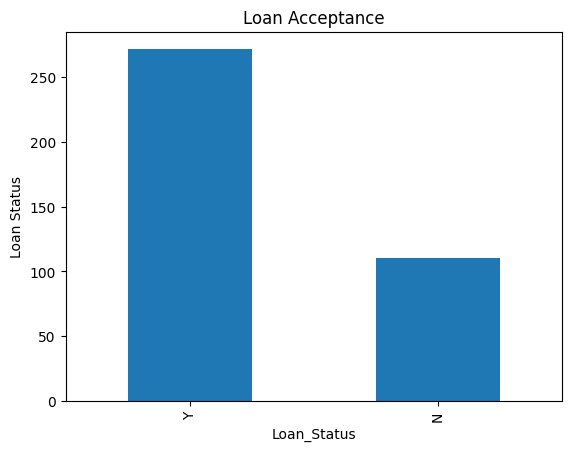

In [5]:
data_frame['Loan_Status'].value_counts().plot(kind='bar',title='Loan Acceptance', ylabel='Loan Status')

In [6]:
# Lets look at different options of categorical data:


categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Amount_Term',  ]
for feature in categorical_features:
    unique_options = data_frame[feature].dropna().unique()
    print(feature + ' options: ' + ', '.join(str(opt) for opt in unique_options))

print('\n')
for feature in categorical_features:
    if pd.isnull(data_frame[feature]).any():
        num_missing_entries = sum(pd.isnull(data_frame[feature]))
        print(feature + ' is missing ' + str(num_missing_entries) + ' entries')

Gender options: Male, Female
Married options: Yes, No
Dependents options: 1, 0, 2, 3+
Education options: Graduate, Not Graduate
Self_Employed options: No, Yes
Credit_History options: 1.0, 0.0
Property_Area options: Rural, Urban, Semiurban
Loan_Amount_Term options: 360.0, 120.0, 240.0, 180.0, 60.0, 300.0, 480.0, 84.0, 12.0, 36.0


Gender is missing 5 entries
Dependents is missing 8 entries
Self_Employed is missing 21 entries
Credit_History is missing 30 entries
Loan_Amount_Term is missing 11 entries


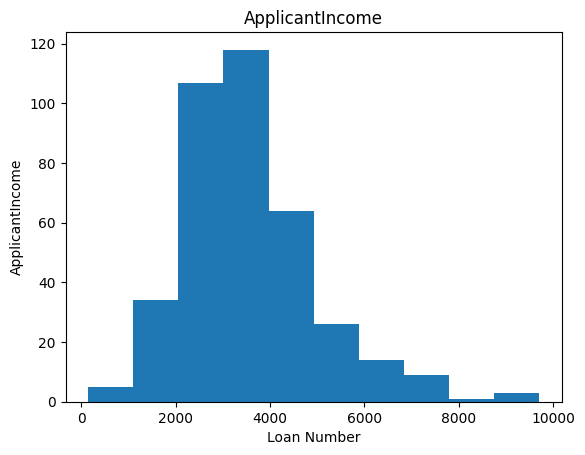

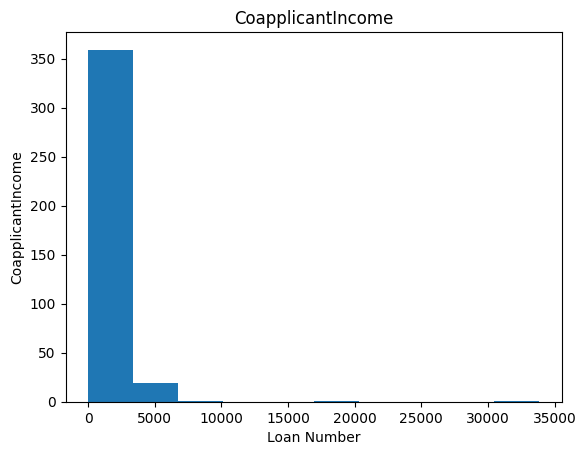

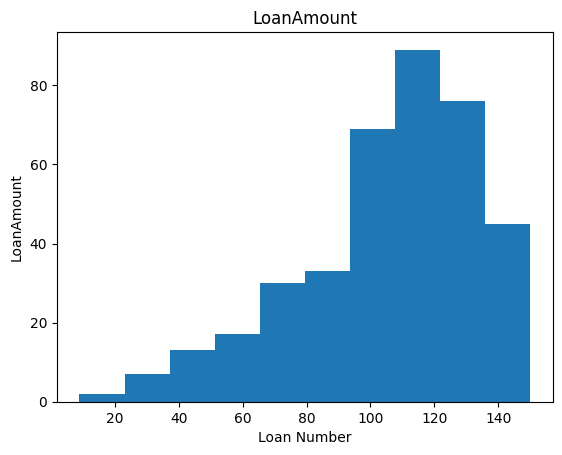

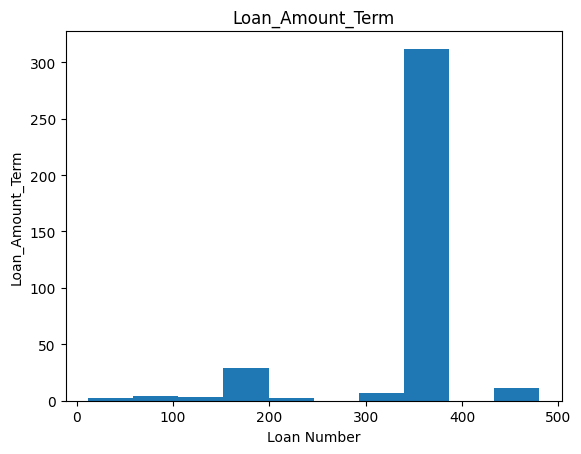

In [10]:
# Lets look at the continous data:
continous_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

for feature in continous_features:
    data_frame[feature].plot(xlabel='Loan Number',ylabel = feature, title=feature, kind='hist')
    plt.show()
    time.sleep(5)
    


In [12]:
# Gender stereotypes?
males = data_frame.loc[data_frame['Gender']=='Male']
male_loan_status = males['Loan_Status'].value_counts()
total_male = sum(male_loan_status)
male_acceptance_rate = male_loan_status[0]/total_male*100
print(f'Males have a {male_acceptance_rate:.0f}% acceptance rate')

females = data_frame.loc[data_frame['Gender']=='Female']
female_loan_status = females['Loan_Status'].value_counts()
total_female = sum(female_loan_status)
female_acceptance_rate = female_loan_status[0]/total_female*100
print(f'Females have a {female_acceptance_rate:.0f}% acceptance rate')

Males have a 73% acceptance rate
Females have a 69% acceptance rate


/var/folders/2b/1qyr4kcd0133yd32t6r09ydm0000gn/T/ipykernel_18058/2388115320.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_acceptance_rate = male_loan_status[0]/total_male*100
/var/folders/2b/1qyr4kcd0133yd32t6r09ydm0000gn/T/ipykernel_18058/2388115320.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_acceptance_rate = female_loan_status[0]/total_female*100


In [ ]:
gender = ['Male', 'Female']

weight_counts = {
    "Accepted": np.array([male_acceptance_rate, female_acceptance_rate]),
    "Declined": np.array([100-male_acceptance_rate, 100-female_acceptance_rate]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(2)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(gender, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Loan Acceptance Rate by Gender")
ax.legend(loc="upper right")
ax.set_ylabel("Acceptance Rate (%)")

plt.show()


In [13]:
# Location stereotypes?
rural = data_frame.loc[data_frame['Property_Area']=='Rural']
rural_status = rural['Loan_Status'].value_counts()
total_rural = sum(rural_status)
rural_acceptance_rate = rural_status[0]/total_rural*100
print(f'Rural properties have a {rural_acceptance_rate:.0f}% acceptance rate')

urban = data_frame.loc[data_frame['Property_Area']=='Urban']
urban_status = urban['Loan_Status'].value_counts()
total_urban = sum(urban_status)
urban_acceptance_rate = urban_status[0]/total_urban*100
print(f'Urban properties have a {urban_acceptance_rate:.0f}% acceptance rate')

suburban = data_frame.loc[data_frame['Property_Area']=='Semiurban']
suburban_status = suburban['Loan_Status'].value_counts()
total_suburban = sum(suburban_status)
suburban_acceptance_rate = suburban_status[0]/total_suburban*100
print(f'Suburban properties have a {suburban_acceptance_rate:.0f}% acceptance rate')


Rural properties have a 61% acceptance rate
Urban properties have a 69% acceptance rate
Suburban properties have a 80% acceptance rate


/var/folders/2b/1qyr4kcd0133yd32t6r09ydm0000gn/T/ipykernel_18058/597127643.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rural_acceptance_rate = rural_status[0]/total_rural*100
/var/folders/2b/1qyr4kcd0133yd32t6r09ydm0000gn/T/ipykernel_18058/597127643.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  urban_acceptance_rate = urban_status[0]/total_urban*100
/var/folders/2b/1qyr4kcd0133yd32t6r09ydm0000gn/T/ipykernel_18058/597127643.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

In [14]:
category = 'Property_Area'
option = 'Rural'
result = 'Loan_Status'
option_data = data_frame.loc[category==option]
option_status = option_data[result].value_counts()
total_option = sum(option_status)
option_acceptance_rate = option_status[0]/total_option*100
print(f'{option} properties have a {option_acceptance_rate:.0f}% acceptance rate')

KeyError: 'False: boolean label can not be used without a boolean index'

In [ ]:
area = ['Rural', 'Urban', 'Suburban']

weight_counts = {
    "Accepted": np.array([rural_acceptance_rate, urban_acceptance_rate, suburban_acceptance_rate]),
    "Declined": np.array([100-rural_acceptance_rate, 100-urban_acceptance_rate, 100-suburban_acceptance_rate]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(len(area))

for boolean, weight_count in weight_counts.items():
    p = ax.bar(area, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Loan Acceptance Rate by Property Location")
ax.legend(loc="upper right")
ax.set_ylabel("Acceptance Rate (%)")

plt.show()

In [ ]:
# Multivariate
feature_1 = 'Gender'
feature_1_options = data_frame[feature_1].dropna().unique()

feature_2 = 'Property_Area'
feature_2_options = data_frame[feature_2].dropna().unique()

doodad = dict()
data_matrix = np.zeros((len(feature_1_options), len(feature_2_options)))

for f1_index, f1 in enumerate(feature_1_options):
    for f2_index, f2 in enumerate(feature_2_options):
        key = f1+f2
        combo_data = data_frame.loc[(data_frame[feature_1]==f1) & (data_frame[feature_2]==f2)]
        status = combo_data['Loan_Status'].value_counts()
        tot = sum(status)
        acceptance_rate = status[0]/tot*100
        doodad[key] = acceptance_rate
        data_matrix[f1_index, f2_index] = acceptance_rate
        print(f'{f1}/{f2} applications have a {acceptance_rate:.0f}% acceptance rate')

In [ ]:
heatmap_data_frame = pd.DataFrame(data_matrix, index=feature_1_options, columns=feature_2_options)
ax = sns.heatmap(heatmap_data_frame, annot=True, cbar=False)
for t in ax.texts: t.set_text(t.get_text() + "%")
ax.set_ylabel(feature_1)
ax.set_xlabel(feature_2)
ax.set_title('Loan Acceptance Rate')